In [ ]:
%pylab inline
import numpy as np
import theano
import pymc3 as pm
import theano.tensor as tt
import matplotlib.pylab as plt
import scipy as sci

In [52]:
N = 100
X = np.random.randn(N, 1)
eps = np.random.randn(N, 1)*.3
y = X*.4 + 1.5 + eps

In [55]:
with pm.Model() as m0:
    beta = pm.Normal('beta', 0, 10)
    a = pm.Normal('a', 0, 10)
    sd = pm.HalfNormal('sd', 5)
    pm.Normal('y', X*beta+a, sd, observed=y)
    trace0 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd_log__, a, beta]
100%|██████████| 1000/1000 [00:02<00:00, 457.23it/s]


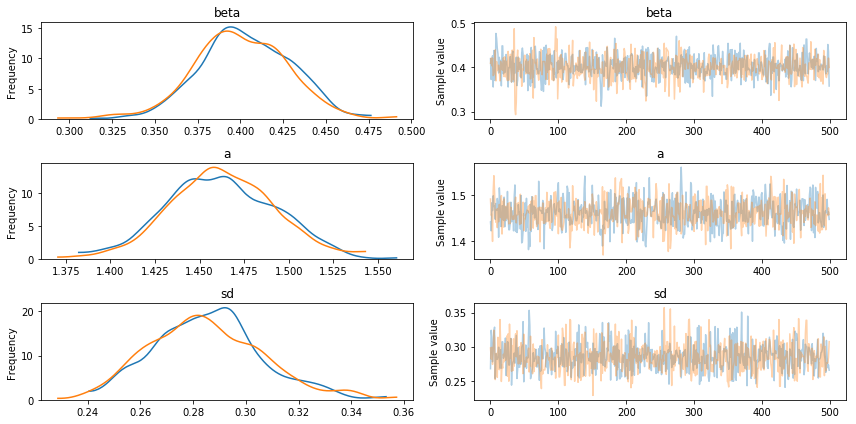

In [57]:
pm.traceplot(trace0);

In [53]:
with pm.Model() as m1:
    beta = pm.Normal('beta', 0, 10)
    a = pm.Normal('a', 0, 10)
    sd = pm.HalfNormal('sd', 5)
    pm.Normal('eps', 0, sd, observed=y - X*beta - a)
    trace1 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd_log__, a, beta]
100%|██████████| 1000/1000 [00:02<00:00, 464.86it/s]


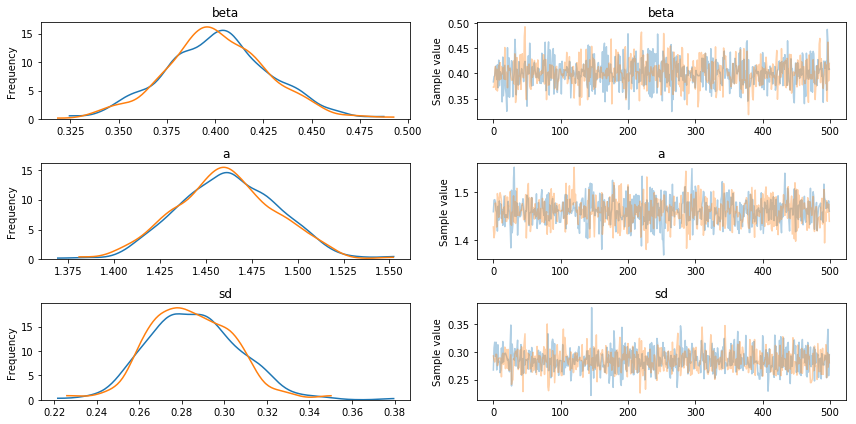

In [54]:
pm.traceplot(trace1);

In [62]:
m1.logp(m1.test_point)

array(-245.0416712)

In [63]:
m0.logp(m1.test_point)

array(-245.0416712)

In [61]:
with m0:
    map0 = pm.find_MAP()
map0

logp = -60.925, ||grad|| = 375.79: 100%|██████████| 21/21 [00:00<00:00, 3068.36it/s]


{'a': array(1.46109253),
 'beta': array(0.40144463),
 'sd': array(0.27809173),
 'sd_log__': array(-1.27980425)}

In [60]:
with m1:
    map1 = pm.find_MAP()
map1

logp = -60.925, ||grad|| = 375.79: 100%|██████████| 21/21 [00:00<00:00, 971.18it/s]


{'a': array(1.46109253),
 'beta': array(0.40144463),
 'sd': array(0.27809173),
 'sd_log__': array(-1.27980425)}